In [315]:
setwd('/import/metabolites/1600')

In [316]:
expr = read.table('./BMK_1_Control_vs_JD4/BMK_2_DEG_Cluster/Control_vs_JD4.txt',row.names = 1,sep = '\t',header =T)

In [317]:
expr1 = expr[,c(4,5,6)]

In [318]:
head(expr,2)

,Control.1,Control.2,Control.3,JD4.1,JD4.2,JD4.3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
evm.TU.scaffold520.10,1.360437,0.573533,1.271172,1.327511,6.895074,5.610351
evm.TU.scaffold1510.12,12.019589,8.107336,11.577633,14.151673,23.863295,24.401491


In [320]:
library(readxl)

In [321]:
meta = read_xlsx('./4vs3(1).xlsx')

In [322]:
meta1 = meta[,c('Name','Norm. Area: 4-4-1.raw (F10)','Norm. Area: 4-4-2.raw (F11)','Norm. Area: 4-4-3.raw (F12)')]

In [323]:
library(dplyr)

In [324]:
meta1 = meta1 %>% tibble::column_to_rownames(.,'Name') 

In [325]:
colnames(meta1) = colnames(expr1)

In [326]:
expr1 = as.data.frame(t(expr1))
meta1 = as.data.frame(t(meta1))

In [327]:
library(psych)#R包psych中的命令corr.test()提供了在计算变量间相关系数的同时执行显著性检验的方法。
merge_cor<- corr.test(expr1, meta1, method = 'pearson')

Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in corr.test(expr1, meta1, method = "pearson"):
"Number of subjects must be greater than 3 to find confidence intervals."


In [ ]:
#merge_cor.raw = merge_cor

In [328]:
merge_cor = merge_cor.raw
merge_cor$p[merge_cor$p >= 0.01] <- -1#筛选，例如在“merge_cor”中，根据 p(<0.05) 值和 r(>=0.5 or <=-0.5) 值做保留
merge_cor$p[merge_cor$p < 0.01 & merge_cor$p >= 0] <- 1
merge_cor$p[merge_cor$p == -1] <- 0
merge_cor$r[abs(merge_cor$r) < 0.8] <- 0
merge_cor_final <- merge_cor$r * merge_cor$p
merge_cor_final = na.omit(merge_cor_final)
#write.csv(merge_cor_final, 'merge_cor_final.csv', quote = FALSE)

In [329]:
a = merge_cor_final[which(rowSums(merge_cor_final) != 0),]

In [330]:
dim(a)

[1] 731  23

In [331]:
head(a,4)

,Cryptotanshinone,tanshinoneV,sibieiquinone A,17-hydroxytanshindiol B,isotanshinone 2A,3-hydroxymethylenetanshi nquinone,Tanshindiol C,norsalvioxide,Succinic acid,miltionone,...,(+)-Lithospermic acid,"Methyl 1,6-dimethyl-10,11-dioxo-1,2,6,7,8,9,10,11-octahydrophenanthro[1,2-b]furan-6-carboxylate","3-Hydroxy-2-isopropyl-8,8-dimethyl-5,6,7,8-tetrahydro-1,4-phenanthrenedione",Methyl tanshinonate,Tanshinon I,miltirone,"1,6-Dimethyl-1,2,8,9-tetrahydrophenanthro[1,2-b]furan-10,11-dione",Tanshinone IIA,microstegiol,salvinone
NewGene_774,0.0000000,0,0,0,0,0,0.0000000,0,0,0,...,0,0.0000000,0,-0.9999991,0,0,0,0.0000000,0,0
evm.TU.C207621.1,0.0000000,0,0,0,0,0,0.0000000,0,0,0,...,0,0.0000000,0,0.0000000,0,0,0,-0.9999982,0,0
NewGene_9213,-0.9999186,0,0,0,0,0,0.0000000,0,0,0,...,0,0.0000000,0,0.0000000,0,0,0,0.0000000,0,0
evm.TU.scaffold8469.2,0.0000000,0,0,0,0,0,0.9999608,0,0,0,...,0,-0.9999754,0,0.0000000,0,0,0,0.0000000,0,0


In [332]:
name = read.csv('./name.csv',header =F)

In [333]:
head(name,3)

,V1,V2
,<chr>,<chr>
1,cryptotanshinone,Cryptotanshinone
2,tanshinoneV,tanshinoneV
3,sibieiquinone A,sibieiquinone A


In [334]:
colnames(a) = name$V1

In [255]:
# https://www.coder.work/article/6614040

In [256]:
dev.off()

null device 
          1

In [211]:
options(repr.plot.width = 6,repr.plot.height = 9)

In [23]:

pdf('heatmap1.pdf',width = 6,height = 9)
library(corrplot)#使用corrplot包中的corrplot()命令对相关性数据进行可视化展示   
corrplot(a, method = 'number', number.cex = 0.5, diag = FALSE, tl.cex = 0.4)
corrplot(a, add = TRUE, type = 'upper', method = 'pie', diag = FALSE,
         tl.pos = 'n', cl.pos = 'n', tl.cex=2)
#corrplot(a, method = 'pie')#饼图
dev.off()

Warning message:
"package 'corrplot' was built under R version 4.2.3"
corrplot 0.92 loaded



png 
  2

In [96]:
write.csv(merge_cor_final,file = 'merge_cor_final.csv')

In [335]:
gene.ko  =read.table('./gene.ko.txt',header =T,sep = '\t')

In [336]:
gene = gene.ko$ID

In [337]:
merge_cor_final1 = a %>% as.data.frame 

In [338]:
merge_cor_final1 = merge_cor_final1[gene,] %>%  na.omit()

In [339]:
dim(merge_cor_final1)

[1] 54 23

In [341]:
keggid= read.table('./KEGG.txt',header =F,sep = '\t')

In [342]:
colnames(gene.ko)

[1] "ID"              "KEGG_annotation"

In [343]:
head(keggid,1)

,V1,V2,V3
,<chr>,<chr>,<chr>
1,K00864,glpK,ko04626


In [344]:
c = merge(gene.ko,keggid,by.x = 'KEGG_annotation',by.y = 'V1')

In [345]:
ko = c('ko04016','ko00904','ko04075','ko04626')

In [346]:
c1 = c[!duplicated(c$V2),] %>%  dplyr::filter(V3 %in%  ko) %>%  dplyr::select(ID,V2)

In [347]:
expr  = merge_cor_final1 %>% tibble::rownames_to_column('ID')

In [348]:
expr2 = left_join(c1,expr,by = 'ID') %>%  na.omit() 

In [349]:
rownames(expr2) = expr2[,2]
expr3 = expr2[,-c(1,2)]

In [350]:
expr3 = expr3[-c(1,2),]

In [399]:
expr2

,ID,V2,cryptotanshinone,tanshinoneV,sibieiquinone A,17-hydroxytanshindiol B,isotanshinone 2A,3-hydroxymethylenetanshi nquinone,tanshindiol C,norsalvioxide,...,lithospermic acid,methyl dihydronortanshinonate,deoxyneocryptotanshinone,methyl tanshinonate,tanshinon I,miltirone,tetrahydro tanshinone I,tanshinone IIA,microstegiol,salvinone
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E5.5.1.13,evm.TU.scaffold10690.3,E5.5.1.13,-0.9999803,0,0.0000000,0.0000000,0.000000,0.0000000,0,0,...,0.0000000,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0
E4.2.3.19,NewGene_18497,E4.2.3.19,0.0000000,0,-0.9999829,0.0000000,0.000000,0.0000000,0,0,...,0.0000000,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0
CML,NewGene_13336,CML,0.0000000,0,0.0000000,0.0000000,0.000000,0.9999518,0,0,...,0.0000000,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0
PRF,NewGene_2412,PRF,-0.9999747,0,0.0000000,0.0000000,0.000000,0.0000000,0,0,...,0.0000000,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0
ABF,evm.TU.scaffold11838.1,ABF,0.0000000,0,0.0000000,0.0000000,0.000000,0.0000000,0,0,...,0.0000000,0,0,0.9999593,0,0,0.0000000,0.0000000,0,0
IAA,evm.TU.scaffold10053.7,IAA,0.0000000,0,0.0000000,0.0000000,0.000000,0.0000000,0,0,...,0.0000000,0,0,0.0000000,0,0,0.0000000,-0.9999941,0,0
SAUR,evm.TU.scaffold12139.13,SAUR,0.0000000,0,0.0000000,0.0000000,0.000000,0.0000000,0,0,...,0.9999454,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0
PYL,evm.TU.scaffold8761.2,PYL,0.0000000,0,0.0000000,0.0000000,0.000000,0.0000000,0,0,...,0.0000000,0,0,0.0000000,0,0,-0.9999243,0.0000000,0,0
ERF1,evm.TU.scaffold5186.1,ERF1,0.0000000,0,0.0000000,0.9999915,0.000000,0.0000000,0,0,...,0.0000000,0,0,0.0000000,0,0,0.0000000,0.0000000,0,0


In [400]:
library(pheatmap)

In [401]:
expr4 = expr3[,which(colSums(expr3) != 0)]

In [402]:
pmtout = expr4

In [403]:

    if(!is.null(pmtout)){
    ssmt <- pmtout< 0
    pmtout[ssmt] <- '**'
    smt <- pmtout > 0.01& pmtout < 1
    pmtout[smt] <- '**'
    pmtout[!ssmt&!smt]<- ''
    } else{
    pmtout <- F
    }

In [404]:
mycol<-colorRampPalette(c("blue","white","tomato"))(800)

In [405]:
colnames(expr4)[1] = 'cryptotanshinone'

png 
  2

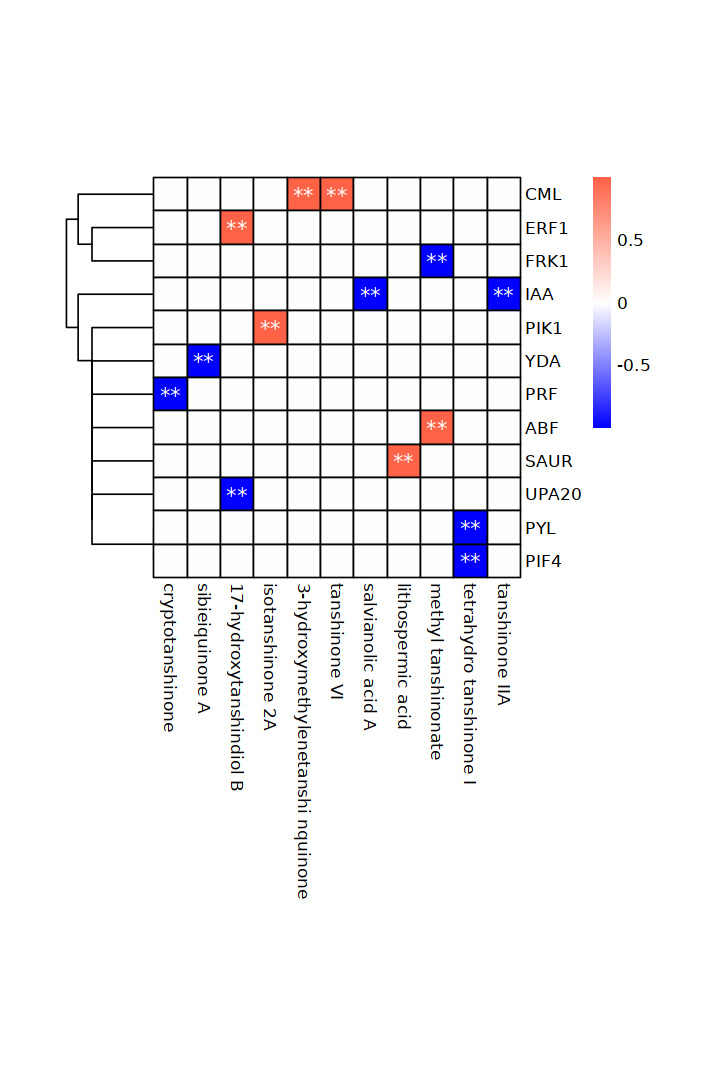

In [406]:
 p = pheatmap(expr4,scale = "none",cluster_row = T, cluster_col = F, border='black',
    fontsize_number = 12, number_color = "white",  display_numbers = pmtout,
    cellwidth = 20, cellheight =20,color=mycol)

pdf(paste0('heatmap','.pdf'))
p
dev.off()

In [313]:
library(tidyr)

expr4 = expr3 %>%  tibble::rownames_to_column(.,'gene')

table_long <- expr4 %>% 
  pivot_longer(cols = -gene, names_to = "metabolite", values_to = "cor") %>%  dplyr::filter(cor != 0)



head(table_long,2)

write.csv(table_long,file = 'table_long.csv',quote = F,col.names = F,row.names = F)

gene,metabolite,cor
<chr>,<chr>,<dbl>
CML,3-hydroxymethylenetanshi nquinone,0.9999518
CML,tanshinone VI,0.9998798


Warning message in write.csv(table_long, file = "table_long.csv", quote = F, col.names = F, :
"attempt to set 'col.names' ignored"


### 基因间相关xing 

In [360]:
expr = read.table('./BMK_1_Control_vs_JD4/BMK_2_DEG_Cluster/Control_vs_JD4.txt',row.names = 1,sep = '\t',header =T)

In [361]:
head(expr,2)

,Control.1,Control.2,Control.3,JD4.1,JD4.2,JD4.3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
evm.TU.scaffold520.10,1.360437,0.573533,1.271172,1.327511,6.895074,5.610351
evm.TU.scaffold1510.12,12.019589,8.107336,11.577633,14.151673,23.863295,24.401491


In [362]:
expr5 = expr %>%  tibble::rownames_to_column(.,'ID')

In [363]:
expr6 = left_join(expr2,expr5,by = 'ID')

In [364]:
head(expr6,2)

,ID,V2,cryptotanshinone,tanshinoneV,sibieiquinone A,17-hydroxytanshindiol B,isotanshinone 2A,3-hydroxymethylenetanshi nquinone,tanshindiol C,norsalvioxide,...,tetrahydro tanshinone I,tanshinone IIA,microstegiol,salvinone,Control.1,Control.2,Control.3,JD4.1,JD4.2,JD4.3
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,evm.TU.scaffold10690.3,E5.5.1.13,-0.9999803,0,0.0000000,0,0,0,0,0,...,0,0,0,0,23.993135,48.48322,22.372145,41.347317,71.849518,97.50892
2,NewGene_18497,E4.2.3.19,0.0000000,0,-0.9999829,0,0,0,0,0,...,0,0,0,0,1.252584,2.23503,0.556391,2.543269,3.748316,6.35028


In [367]:
expr7 = expr6[,c(2,26:31)] %>%  tibble::column_to_rownames(.,'V2')

In [369]:
expr7 = expr7[-c(1,2),]

In [371]:
data = expr7

In [372]:
gene_name1<-c()
gene_name2<-c()
cor_r<-c()
pvalue<-c()

# 准备好循环体-可使用嵌套的for循环，完成完整的计算但不重复
# 注意第二个for循环的值为 i: nrow(data)，这一点很巧妙

for (i in 1:nrow(data)){
  for (r in i:nrow(data)){
    g1=rownames(data)[i]
    g2=rownames(data)[r]
    c_r=cor(as.numeric(data[i,]),as.numeric(data[r,]),method="pearson")
    p=cor.test(as.numeric(data[i,]),as.numeric(data[r,]),method ="pearson")[[3]]
    ##保存每一步的数据，而不可直接以空向量作为每一步运行的结果
    gene_name1=c(gene_name1,g1)
    gene_name2=c(gene_name2,g2)
    cor_r=c(cor_r,c_r)
    pvalue=c(pvalue,p)
       }
}

###输出为数据框，导出结果
data_cor<-data.frame(gene_name1,gene_name2,cor_r,pvalue)

In [390]:
data_cor2 = data_cor %>%  filter(pvalue < 0.01) %>%  filter(0.8 < abs(cor_r))  %>% filter(abs(cor_r) != 1.0000000)

In [394]:
data_cor2 = data_cor2[-19,-4]

In [395]:
data_cor2

,gene_name1,gene_name2,cor_r
,<chr>,<chr>,<dbl>
1,CML,PRF,0.9860290
2,CML,ABF,0.9330592
3,CML,SAUR,0.9777891
4,CML,PYL,0.9694207
5,CML,PIF4,-0.9676395
6,CML,FRK1,0.9534431
7,CML,UPA20,-0.9289694
8,PRF,ABF,0.9310791
9,PRF,SAUR,0.9418842


In [396]:
write.csv(data_cor2,file = 'data_cor2.csv',quote = F,col.names = F,row.names = F)

Warning message in write.csv(data_cor2, file = "data_cor2.csv", quote = F, col.names = F, :
"attempt to set 'col.names' ignored"


In [409]:
kegg = read.csv('./Control_vs_JD4_KEGG_pathway_enrich.csv',check.names = F)

In [412]:
head(kegg,2)

,KEGG_A_class,KEGG_B_class,ID,Pathway,GeneRatio,BgRatio,enrich_factor,pvalue,qvalue,geneID,gene_number,Contained
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,Organismal Systems,Environmental adaptation,ko04626,Plant-pathogen interaction,21.16%,12.54%,1.69,1.480000e-16,1.780000e-14,NewGene_10068;NewGene_10273;NewGene_10415;NewGene_10524;NewGene_10901;NewGene_10917;NewGene_10931;NewGene_11168;NewGene_11231;NewGene_11390;NewGene_11676;NewGene_11732;NewGene_11961;NewGene_12164;NewGene_12173;NewGene_12375;NewGene_12483;NewGene_12652;NewGene_13086;NewGene_13336;NewGene_1354;NewGene_13773;NewGene_13781;NewGene_13808;NewGene_14121;NewGene_14337;NewGene_14375;NewGene_14584;NewGene_14636;NewGene_14992;NewGene_15023;NewGene_15102;NewGene_15103;NewGene_1519;NewGene_15330;NewGene_15468;NewGene_15845;NewGene_15951;NewGene_15954;NewGene_16175;NewGene_16406;NewGene_16418;NewGene_16439;NewGene_16448;NewGene_166;NewGene_16856;NewGene_17020;NewGene_17207;NewGene_17633;NewGene_17973;NewGene_18353;NewGene_18478;NewGene_1882;NewGene_18878;NewGene_2038;NewGene_2412;NewGene_2413;NewGene_2438;NewGene_2469;NewGene_2489;NewGene_2495;NewGene_2706;NewGene_2928;NewGene_3139;NewGene_3324;NewGene_3594;NewGene_3698;NewGene_3923;NewGene_3925;NewGene_4015;NewGene_402;NewGene_4155;NewGene_4291;NewGene_4329;NewGene_4370;NewGene_4372;NewGene_4383;NewGene_4387;NewGene_4389;NewGene_4391;NewGene_4443;NewGene_4616;NewGene_4902;NewGene_5245;NewGene_532;NewGene_5347;NewGene_5499;NewGene_5532;NewGene_5559;NewGene_5616;NewGene_5693;NewGene_5698;NewGene_5770;NewGene_5887;NewGene_5952;NewGene_6102;NewGene_6242;NewGene_6273;NewGene_6532;NewGene_6537;NewGene_6742;NewGene_6822;NewGene_6831;NewGene_6935;NewGene_6945;NewGene_6946;NewGene_7230;NewGene_7295;NewGene_7352;NewGene_7455;NewGene_7598;NewGene_7599;NewGene_7684;NewGene_7830;NewGene_789;NewGene_79;NewGene_8133;NewGene_848;NewGene_8536;NewGene_8537;NewGene_8771;NewGene_8808;NewGene_8832;NewGene_8862;NewGene_8954;NewGene_901;NewGene_9071;NewGene_9072;NewGene_9139;NewGene_9231;NewGene_9300;NewGene_9358;NewGene_9587;NewGene_9941;NewGene_9942;evm.TU.C205859.1;evm.TU.C211445.1;evm.TU.C211629.4;evm.TU.C212567.3;evm.TU.C213531.1;evm.TU.C215823.1;evm.TU.C216491.1;evm.TU.C217201.1;evm.TU.C218827.3;evm.TU.C220281.9;evm.TU.C221205.1;evm.TU.C221305.11;evm.TU.C221457.3;evm.TU.C222149.3;evm.TU.C222571.32;evm.TU.scaffold1000.2;evm.TU.scaffold10101.9;evm.TU.scaffold1055.2;evm.TU.scaffold1055.4;evm.TU.scaffold11103.3;evm.TU.scaffold11122.1;evm.TU.scaffold1151.1;evm.TU.scaffold11932.10;evm.TU.scaffold11975.10;evm.TU.scaffold12024.3;evm.TU.scaffold12259.2;evm.TU.scaffold12326.1;evm.TU.scaffold12599.9;evm.TU.scaffold12656.6;evm.TU.scaffold12678.1;evm.TU.scaffold12713.1;evm.TU.scaffold1330.1;evm.TU.scaffold1386.5;evm.TU.scaffold1487.2;evm.TU.scaffold2.4;evm.TU.scaffold2010.2;evm.TU.scaffold2217.2;evm.TU.scaffold2291.11;evm.TU.scaffold230.12;evm.TU.scaffold2400.5;evm.TU.scaffold256.24;evm.TU.scaffold2752.5;evm.TU.scaffold3077.8;evm.TU.scaffold3241.3;evm.TU.scaffold3386.3;evm.TU.scaffold3595.2;evm.TU.scaffold3608.27;evm.TU.scaffold363.3;evm.TU.scaffold3827.3;evm.TU.scaffold3865.2;evm.TU.scaffold4616.8;evm.TU.scaffold5191.14;evm.TU.scaffold5233.17;evm.TU.scaffold5324.1;evm.TU.scaffold5755.15;evm.TU.scaffold6499.2;evm.TU.scaffold6509.7;evm.TU.scaffold655.10;evm.TU.scaffold655.7;evm.TU.scaffold655.9;evm.TU.scaffold6633.19;evm.TU.scaffold6808.22;evm.TU.scaffold6809.2;evm.TU.scaffold6822.3;evm.TU.scaffold7115.15;evm.TU.scaffold7325.2;evm.TU.scaffold75.8;evm.TU.scaffold75.9;evm.TU.scaffold7501.17;evm.TU.scaffold7789.4;evm.TU.scaffold8056.33;evm.TU.scaffold839.6;evm.TU.scaffold847.2;evm.TU.scaffold8595.2;evm.TU.scaffold8717.2;evm.TU.scaffold8927.8;evm.TU.scaffold9390.1;evm.TU.scaffold955.1;evm.TU.scaffold990.3;evm.TU.scaffold9935.2;evm.TU.scaffold999.22,216,up&down
2,Metabolism,Metabolism of other amino acids,ko00460,Cyanoamino acid metabolism,1.76%,0.90%,1.95,3.960838e-03,2.136138e-01,NewGene_10165;NewGene_12547;NewGene_1

In [413]:
kegg1 = kegg[c(1:17),]

In [414]:
ko = c('ko04016','ko00904','ko04075')

In [415]:
kegg2 = kegg %>%  dplyr::filter(ID %in% ko)

In [416]:
kegg3 = rbind(kegg1,kegg2)

In [417]:
head(kegg3,2)

,KEGG_A_class,KEGG_B_class,ID,Pathway,GeneRatio,BgRatio,enrich_factor,pvalue,qvalue,geneID,gene_number,Contained
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,Organismal Systems,Environmental adaptation,ko04626,Plant-pathogen interaction,21.16%,12.54%,1.69,1.480000e-16,1.780000e-14,NewGene_10068;NewGene_10273;NewGene_10415;NewGene_10524;NewGene_10901;NewGene_10917;NewGene_10931;NewGene_11168;NewGene_11231;NewGene_11390;NewGene_11676;NewGene_11732;NewGene_11961;NewGene_12164;NewGene_12173;NewGene_12375;NewGene_12483;NewGene_12652;NewGene_13086;NewGene_13336;NewGene_1354;NewGene_13773;NewGene_13781;NewGene_13808;NewGene_14121;NewGene_14337;NewGene_14375;NewGene_14584;NewGene_14636;NewGene_14992;NewGene_15023;NewGene_15102;NewGene_15103;NewGene_1519;NewGene_15330;NewGene_15468;NewGene_15845;NewGene_15951;NewGene_15954;NewGene_16175;NewGene_16406;NewGene_16418;NewGene_16439;NewGene_16448;NewGene_166;NewGene_16856;NewGene_17020;NewGene_17207;NewGene_17633;NewGene_17973;NewGene_18353;NewGene_18478;NewGene_1882;NewGene_18878;NewGene_2038;NewGene_2412;NewGene_2413;NewGene_2438;NewGene_2469;NewGene_2489;NewGene_2495;NewGene_2706;NewGene_2928;NewGene_3139;NewGene_3324;NewGene_3594;NewGene_3698;NewGene_3923;NewGene_3925;NewGene_4015;NewGene_402;NewGene_4155;NewGene_4291;NewGene_4329;NewGene_4370;NewGene_4372;NewGene_4383;NewGene_4387;NewGene_4389;NewGene_4391;NewGene_4443;NewGene_4616;NewGene_4902;NewGene_5245;NewGene_532;NewGene_5347;NewGene_5499;NewGene_5532;NewGene_5559;NewGene_5616;NewGene_5693;NewGene_5698;NewGene_5770;NewGene_5887;NewGene_5952;NewGene_6102;NewGene_6242;NewGene_6273;NewGene_6532;NewGene_6537;NewGene_6742;NewGene_6822;NewGene_6831;NewGene_6935;NewGene_6945;NewGene_6946;NewGene_7230;NewGene_7295;NewGene_7352;NewGene_7455;NewGene_7598;NewGene_7599;NewGene_7684;NewGene_7830;NewGene_789;NewGene_79;NewGene_8133;NewGene_848;NewGene_8536;NewGene_8537;NewGene_8771;NewGene_8808;NewGene_8832;NewGene_8862;NewGene_8954;NewGene_901;NewGene_9071;NewGene_9072;NewGene_9139;NewGene_9231;NewGene_9300;NewGene_9358;NewGene_9587;NewGene_9941;NewGene_9942;evm.TU.C205859.1;evm.TU.C211445.1;evm.TU.C211629.4;evm.TU.C212567.3;evm.TU.C213531.1;evm.TU.C215823.1;evm.TU.C216491.1;evm.TU.C217201.1;evm.TU.C218827.3;evm.TU.C220281.9;evm.TU.C221205.1;evm.TU.C221305.11;evm.TU.C221457.3;evm.TU.C222149.3;evm.TU.C222571.32;evm.TU.scaffold1000.2;evm.TU.scaffold10101.9;evm.TU.scaffold1055.2;evm.TU.scaffold1055.4;evm.TU.scaffold11103.3;evm.TU.scaffold11122.1;evm.TU.scaffold1151.1;evm.TU.scaffold11932.10;evm.TU.scaffold11975.10;evm.TU.scaffold12024.3;evm.TU.scaffold12259.2;evm.TU.scaffold12326.1;evm.TU.scaffold12599.9;evm.TU.scaffold12656.6;evm.TU.scaffold12678.1;evm.TU.scaffold12713.1;evm.TU.scaffold1330.1;evm.TU.scaffold1386.5;evm.TU.scaffold1487.2;evm.TU.scaffold2.4;evm.TU.scaffold2010.2;evm.TU.scaffold2217.2;evm.TU.scaffold2291.11;evm.TU.scaffold230.12;evm.TU.scaffold2400.5;evm.TU.scaffold256.24;evm.TU.scaffold2752.5;evm.TU.scaffold3077.8;evm.TU.scaffold3241.3;evm.TU.scaffold3386.3;evm.TU.scaffold3595.2;evm.TU.scaffold3608.27;evm.TU.scaffold363.3;evm.TU.scaffold3827.3;evm.TU.scaffold3865.2;evm.TU.scaffold4616.8;evm.TU.scaffold5191.14;evm.TU.scaffold5233.17;evm.TU.scaffold5324.1;evm.TU.scaffold5755.15;evm.TU.scaffold6499.2;evm.TU.scaffold6509.7;evm.TU.scaffold655.10;evm.TU.scaffold655.7;evm.TU.scaffold655.9;evm.TU.scaffold6633.19;evm.TU.scaffold6808.22;evm.TU.scaffold6809.2;evm.TU.scaffold6822.3;evm.TU.scaffold7115.15;evm.TU.scaffold7325.2;evm.TU.scaffold75.8;evm.TU.scaffold75.9;evm.TU.scaffold7501.17;evm.TU.scaffold7789.4;evm.TU.scaffold8056.33;evm.TU.scaffold839.6;evm.TU.scaffold847.2;evm.TU.scaffold8595.2;evm.TU.scaffold8717.2;evm.TU.scaffold8927.8;evm.TU.scaffold9390.1;evm.TU.scaffold955.1;evm.TU.scaffold990.3;evm.TU.scaffold9935.2;evm.TU.scaffold999.22,216,up&down
2,Metabolism,Metabolism of other amino acids,ko00460,Cyanoamino acid metabolism,1.76%,0.90%,1.95,3.960838e-03,2.136138e-01,NewGene_10165;NewGene_12547;NewGene_1

In [419]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"

Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha




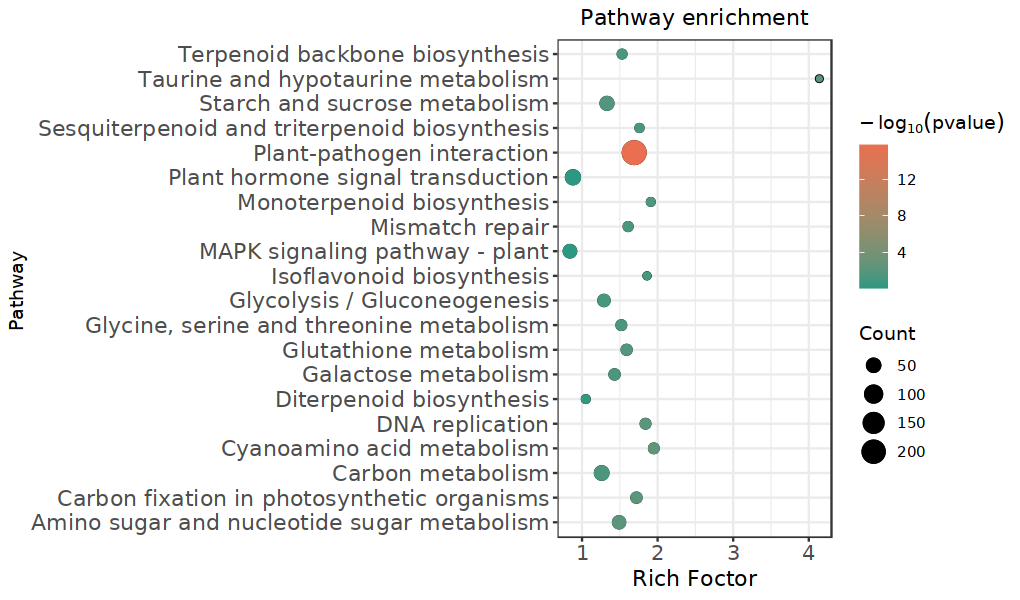

In [422]:
options(repr.plot.width  = 8.5,repr.plot.height = 5)

p = ggplot(kegg3,aes(enrich_factor	,Pathway))
p=p + geom_point()  
p=p + geom_point(aes(size=gene_number))
pbubble = p+ geom_point(aes(size=gene_number,color=-1*log10(pvalue)))
pr = pbubble+scale_color_gradient(low="#2B9882",high = "#E96F50")
pr = pr+labs(color=expression(-log[10](pvalue)),size="Count",  
                        x="Rich Foctor",y="Pathway ",title="Pathway enrichment")
pr + theme_bw()+
  theme(axis.title.x = element_text(size = 13))+
  theme(axis.text.x = element_text(size = 12))+
  theme(axis.text.y = element_text(size = 13))+
  theme(plot.title = element_text(size = 13,face = 4, hjust =0.5))

In [424]:
ggsave('kegg.pdf',width = 7.5,height = 5)